In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.basemap import Basemap

## . divided into 4 subgroups

From Lin's research (2020), median latitude of central-south subpopulation is -9.27.

In [2]:
position = pd.read_csv("C:/Users/Darui Yen/MEGAsync/agron_thesis/code/output/crawler_pimpinellifolium_list.csv")
tomato = pd.read_csv('C:/Users/Darui Yen/MEGAsync/agron_thesis/code/output/subgroup_mean_sd.csv').iloc[:, 1:]
tomato.at[92, 'origin'] = 'Ecuador'

In [3]:
centersouth_lat = [-9.94, -9.4817, -16.4, -6.6333, -8.39, -8.37, -8.54, -9.27, -8.925, -10.0583, -9.5467, -9.1567, -9.5083]
median_lat = np.median(centersouth_lat)
sub_ecuador = tomato[tomato.origin == 'Ecuador']
sub_mexico = tomato[tomato.origin.isin(['United States', 'Venezuela', 'Mexico', 'El Salvador', 'Canada', 'Honduras'])]
sub_peru = tomato[tomato.origin == 'Peru']
sub_northperu = sub_peru[sub_peru.latitude > median_lat]
sub_southperu = sub_peru[sub_peru.latitude <= median_lat]

print('Latitude threshold for north & south Peru subpopulation:', median_lat)
print('sub_mexico: ', len(sub_mexico), '\nsub_ecuador: ', len(sub_ecuador))
print('sub_northperu: ', len(sub_northperu), '\nsub_southperu: ', len(sub_southperu))

Latitude threshold for north & south Peru subpopulation: -9.27
sub_mexico:  24 
sub_ecuador:  20
sub_northperu:  93 
sub_southperu:  44


In [4]:
sub_mexico['subgroup'] = 'central america'
sub_ecuador['subgroup'] = 'ecuador'
sub_northperu['subgroup'] = 'north peru'
sub_southperu['subgroup'] = 'south peru'
sub_group = pd.concat([sub_mexico, sub_ecuador, sub_northperu, sub_southperu], axis = 0)
sub_group = sub_group.loc[:, ['accession', 'subgroup', 'Fmean', 'Mmean', 'MFratio', 'exsertion']]

# sub_group.to_csv('subgroup_anova.csv')

sub_position = position.copy()[['accession', 'latitude', 'longitude']]
sub_group = sub_group.reset_index(drop = True)
done_group = sub_group.merge(sub_position, how = 'inner', on = 'accession')
map_data = done_group[done_group.latitude < 100].reset_index(drop = True)

C:\Users\Darui Yen\Anaconda3\envs\aging_test\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Text(0.5, 1.0, 'Correlation between 4 Exsertion-Related Traits')

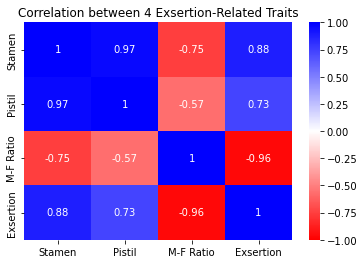

In [24]:
corr_df = sub_group.corr()
corr_df.columns = ['Stamen', 'Pistil', 'M-F Ratio', 'Exsertion']
corr_df.index = corr_df.columns
sb.heatmap(corr_df, cmap = 'bwr_r', annot = True, vmin = -1, vmax = 1)
plt.title('Correlation between 4 Exsertion-Related Traits')

## . boxplot of phenotype

Text(0, 0.5, 'length (mm)')

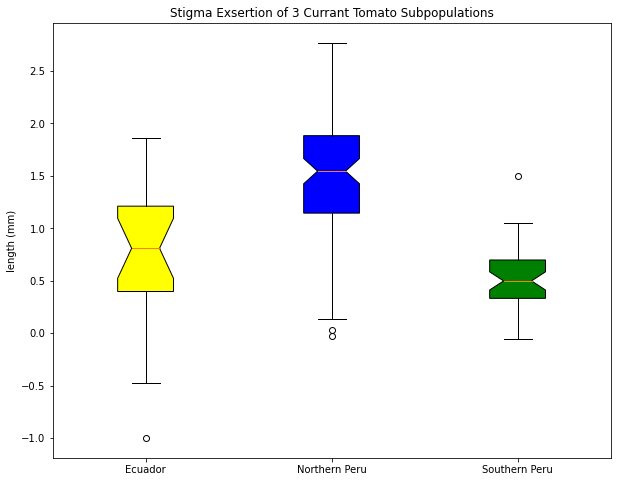

In [5]:
box_data = [sub_mexico.exsertion, sub_ecuador.exsertion, sub_northperu.exsertion, sub_southperu.exsertion]
fig = plt.figure(figsize = (10, 8))
# plt.boxplot(box_data[0], positions = [1], notch = True, patch_artist = True, boxprops = dict(facecolor = 'red'))
plt.boxplot(box_data[1], positions = [1], notch = True, patch_artist = True, boxprops = dict(facecolor = 'yellow'), widths = (0.3))
plt.boxplot(box_data[2], positions = [2], notch = True, patch_artist = True, boxprops = dict(facecolor = 'blue'), widths = (0.3))
plt.boxplot(box_data[3], positions = [3], notch = True, patch_artist = True, boxprops = dict(facecolor = 'green'), widths = (0.3))
plt.xticks([1, 2, 3], ['Ecuador', 'Northern Peru', 'Southern Peru'])
plt.title('Stigma Exsertion of 3 Currant Tomato Subpopulations')
plt.ylabel('length (mm)')

Text(0, 0.5, 'ratio')

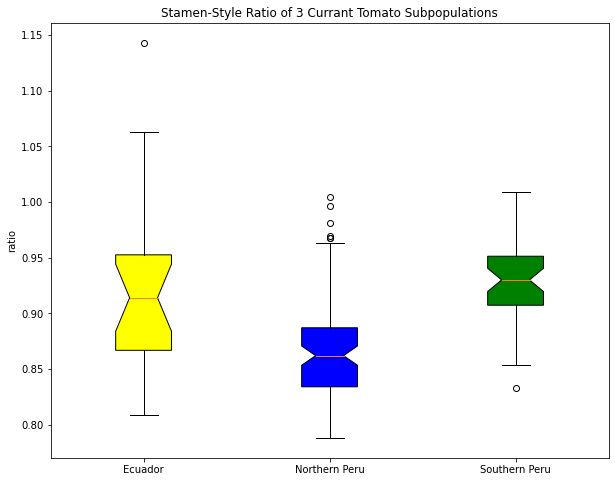

In [6]:
box_data = [sub_mexico.MFratio, sub_ecuador.MFratio, sub_northperu.MFratio, sub_southperu.MFratio]
fig = plt.figure(figsize = (10, 8))
# plt.boxplot(box_data[0], positions = [1], notch = True, patch_artist = True, boxprops = dict(facecolor = 'red'))
plt.boxplot(box_data[1], positions = [1], notch = True, patch_artist = True, boxprops = dict(facecolor = 'yellow'), widths = (0.3))
plt.boxplot(box_data[2], positions = [2], notch = True, patch_artist = True, boxprops = dict(facecolor = 'blue'), widths = (0.3))
plt.boxplot(box_data[3], positions = [3], notch = True, patch_artist = True, boxprops = dict(facecolor = 'green'), widths = (0.3))
plt.xticks([1, 2, 3], ['Ecuador', 'Northern Peru', 'Southern Peru'])
plt.title('Stamen-Style Ratio of 3 Currant Tomato Subpopulations')
plt.ylabel('ratio')

Text(0, 0.5, 'length (mm)')

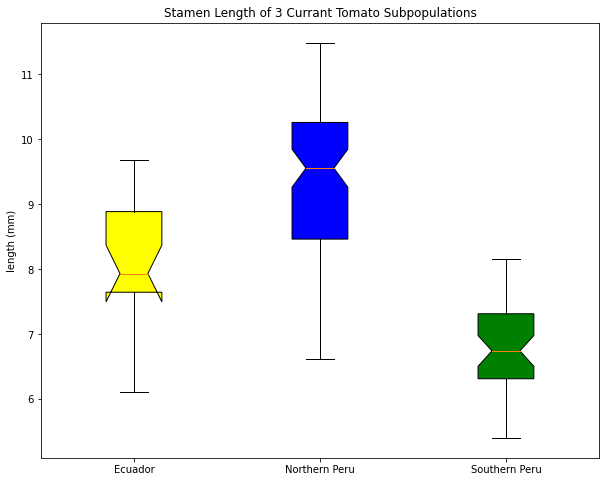

In [7]:
box_data = [sub_mexico.Mmean, sub_ecuador.Mmean, sub_northperu.Mmean, sub_southperu.Mmean]
fig = plt.figure(figsize = (10, 8))
# plt.boxplot(box_data[0], positions = [1], notch = True, patch_artist = True, boxprops = dict(facecolor = 'red'))
plt.boxplot(box_data[1], positions = [1], notch = True, patch_artist = True, boxprops = dict(facecolor = 'yellow'), widths = (0.3))
plt.boxplot(box_data[2], positions = [2], notch = True, patch_artist = True, boxprops = dict(facecolor = 'blue'), widths = (0.3))
plt.boxplot(box_data[3], positions = [3], notch = True, patch_artist = True, boxprops = dict(facecolor = 'green'), widths = (0.3))
plt.xticks([1, 2, 3], ['Ecuador', 'Northern Peru', 'Southern Peru'])
plt.title('Stamen Length of 3 Currant Tomato Subpopulations')
plt.ylabel('length (mm)')

Text(0, 0.5, 'length (mm)')

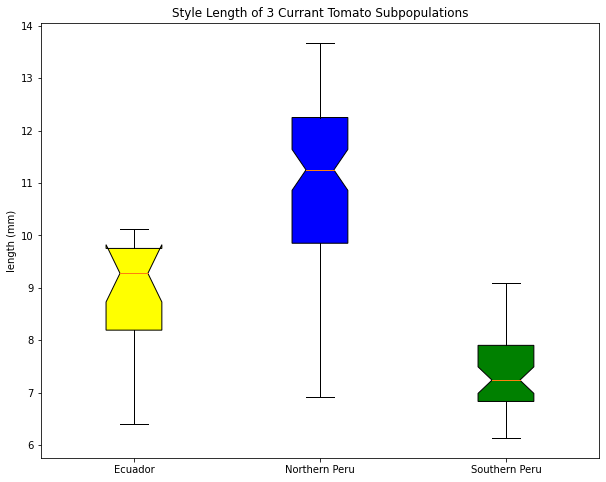

In [8]:
box_data = [sub_mexico.Fmean, sub_ecuador.Fmean, sub_northperu.Fmean, sub_southperu.Fmean]
fig = plt.figure(figsize = (10, 8))
# plt.boxplot(box_data[0], positions = [1], notch = True, patch_artist = True, boxprops = dict(facecolor = 'red'))
plt.boxplot(box_data[1], positions = [1], notch = True, patch_artist = True, boxprops = dict(facecolor = 'yellow'), widths = (0.3))
plt.boxplot(box_data[2], positions = [2], notch = True, patch_artist = True, boxprops = dict(facecolor = 'blue'), widths = (0.3))
plt.boxplot(box_data[3], positions = [3], notch = True, patch_artist = True, boxprops = dict(facecolor = 'green'), widths = (0.3))
plt.xticks([1, 2, 3], ['Ecuador', 'Northern Peru', 'Southern Peru'])
plt.title('Style Length of 3 Currant Tomato Subpopulations')
plt.ylabel('length (mm)')

## . map

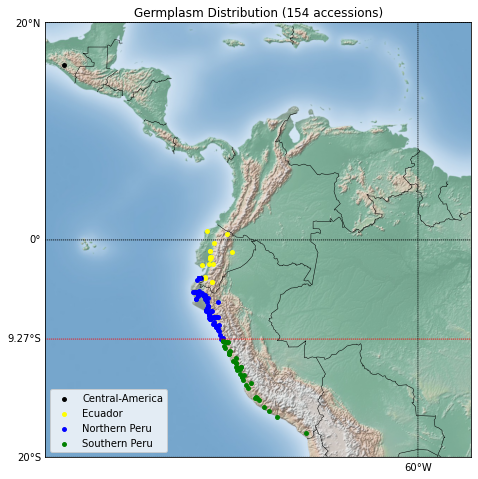

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize = (12, 8))
m = Basemap(projection = 'merc', llcrnrlat = -20, urcrnrlat = 20, llcrnrlon = -95, urcrnrlon = -55, lat_ts = 20, 
            resolution = 'l')
m.shadedrelief()

m.drawparallels(np.arange(-80.,81.,20.), labels=[1,0,0,0])
m.drawparallels(np.arange(-9.27,0,9.27), color = 'red', labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,60.), labels=[1,0,0,1])
m.drawcountries()
plt.title("Germplasm Distribution (154 accessions)")

for i, sub in enumerate(['central america', 'ecuador', 'north peru', 'south peru']):
    target = map_data[map_data.subgroup == sub]
    color = ['black', 'yellow', 'blue', 'green']
    lab = ['Central-America', 'Ecuador', 'Northern Peru', 'Southern Peru']
    m.scatter(x = target["longitude"], y = target["latitude"], latlon = True, c = color[i], s = 15, label = lab[i])

plt.legend()
plt.show()
plt.savefig('C:/Users/Darui Yen/OneDrive//桌面/pim_subpopulation.pdf')

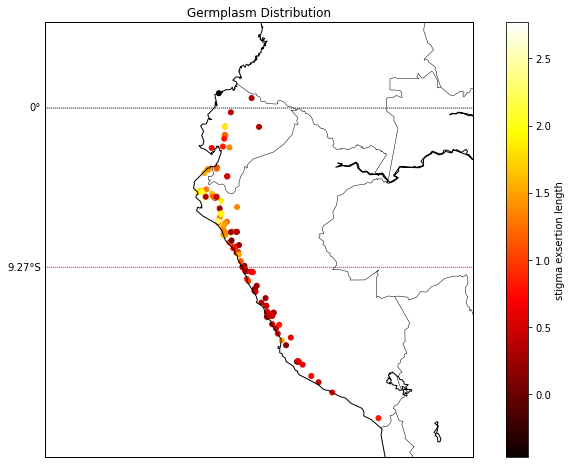

In [191]:
plt.figure(figsize = (12, 8))
m = Basemap(projection = 'merc', llcrnrlat = -20, urcrnrlat = 5, llcrnrlon = -90, urcrnrlon = -65, lat_ts = 20, 
            resolution = 'l')
m.drawcoastlines()

m.drawparallels(np.arange(-90.,90.,30.), labels=[1,0,0,0])
m.drawparallels(np.arange(-9.27,0,9.27), color = 'red', labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,60.))

m.drawlsmask(ocean_color = "aqua")
m.drawmapboundary()
m.drawcountries()

plt.title("Germplasm Distribution")
m.scatter(x = map_data["longitude"], y = map_data["latitude"], latlon = True, c = map_data['exsertion'], s = 25, cmap = 'hot')
plt.colorbar(label = 'stigma exsertion length')
plt.show()

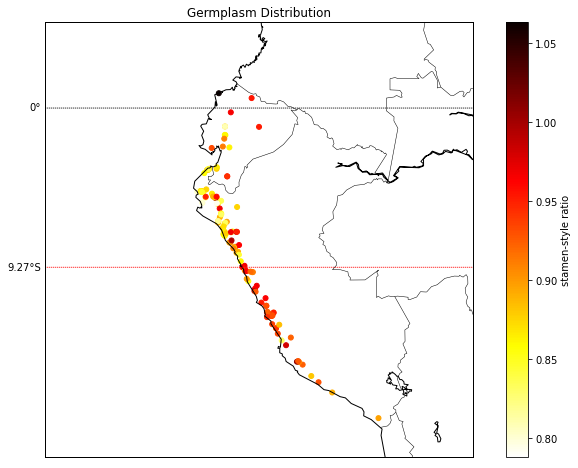

In [13]:
plt.figure(figsize = (12, 8))
m = Basemap(projection = 'merc', llcrnrlat = -20, urcrnrlat = 5, llcrnrlon = -90, urcrnrlon = -65, lat_ts = 20, 
            resolution = 'l')
m.drawcoastlines()

m.drawparallels(np.arange(-90.,90.,30.), labels=[1,0,0,0])
m.drawparallels(np.arange(-9.27,0,9.27), color = 'red', labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,60.))

m.drawlsmask(ocean_color = "aqua")
m.drawmapboundary()
m.drawcountries()

plt.title("Germplasm Distribution")
m.scatter(x = map_data["longitude"], y = map_data["latitude"], latlon = True, c = map_data['MFratio'], s = 25, cmap = 'hot_r')
plt.colorbar(label = 'stamen-style ratio')
plt.show()

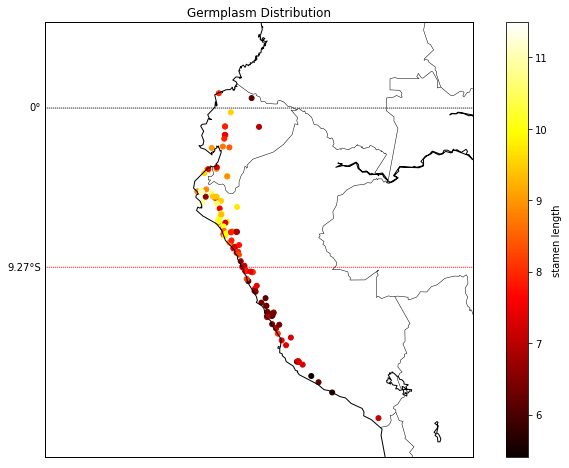

In [13]:
plt.figure(figsize = (12, 8))
m = Basemap(projection = 'merc', llcrnrlat = -20, urcrnrlat = 5, llcrnrlon = -90, urcrnrlon = -65, lat_ts = 20, 
            resolution = 'l')
m.drawcoastlines()

m.drawparallels(np.arange(-90.,90.,30.), labels=[1,0,0,0])
m.drawparallels(np.arange(-9.27,0,9.27), color = 'red', labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,60.))

m.drawlsmask(ocean_color = "aqua")
m.drawmapboundary()
m.drawcountries()

plt.title("Germplasm Distribution")
m.scatter(x = map_data["longitude"], y = map_data["latitude"], latlon = True, c = map_data['Mmean'], s = 25, cmap = 'hot')
plt.colorbar(label = 'stamen length')
plt.show()

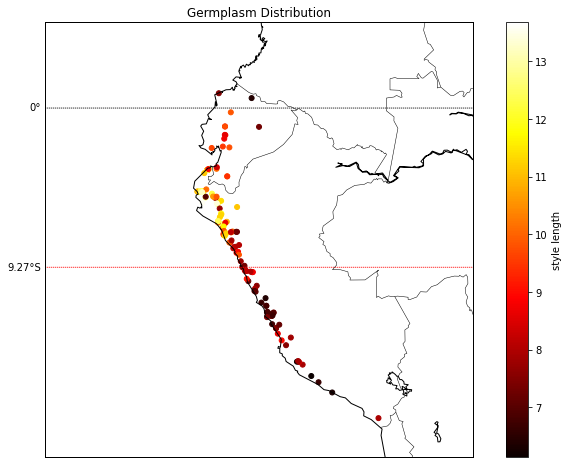

In [14]:
plt.figure(figsize = (12, 8))
m = Basemap(projection = 'merc', llcrnrlat = -20, urcrnrlat = 5, llcrnrlon = -90, urcrnrlon = -65, lat_ts = 20, 
            resolution = 'l')
m.drawcoastlines()

m.drawparallels(np.arange(-90.,90.,30.), labels=[1,0,0,0])
m.drawparallels(np.arange(-9.27,0,9.27), color = 'red', labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,60.))

m.drawlsmask(ocean_color = "aqua")
m.drawmapboundary()
m.drawcountries()

plt.title("Germplasm Distribution")
m.scatter(x = map_data["longitude"], y = map_data["latitude"], latlon = True, c = map_data['Fmean'], s = 25, cmap = 'hot')
plt.colorbar(label = 'style length')
plt.show()